In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2013.csv
/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2008.csv
/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Results 2018.csv
/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2002.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import lightgbm as lgb
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Data


In [3]:
df02 = pd.read_csv('/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2002.csv', encoding = 'ISO-8859-1')
df08 = pd.read_csv('/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2008.csv',encoding = 'ISO-8859-1')
df13 = pd.read_csv('/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Result 2013.csv',encoding = 'ISO-8859-1')
df18 = pd.read_csv('/kaggle/input/elections-in-pakistan-2002-2023/National Assembly Results 2018.csv',encoding = 'ISO-8859-1')

# Data Preprocessing

In [4]:
print('Dimensions of election result 2002: ', df02.shape)
print('Dimensions of election result 2008: ', df08.shape)
print('Dimensions of election result 2013: ', df13.shape)
print('Dimensions of election result 2018: ', df18.shape)

Dimensions of election result 2002:  (1793, 11)
Dimensions of election result 2008:  (2316, 11)
Dimensions of election result 2013:  (4542, 12)
Dimensions of election result 2018:  (3428, 12)


In [5]:
print('unique values in election result 2002: \n',df02.nunique())
print('\nunique values in election result 2008: \n',df08.nunique())
print('\nunique values in election result 2013: \n',df13.nunique())
print('\nunique values in election result 2018: \n',df18.nunique())

unique values in election result 2002: 
 District                     95
Seat                        272
Constituency_title          272
Candidate_Name             1742
Party                        83
Votes                      1482
Total_Valid_Votes           272
Total_Rejected_Votes        263
Total_Votes                 272
Total_Registered_Voters     272
Turnout                     258
dtype: int64

unique values in election result 2008: 
 Unnamed: 0               2316
Seat                      267
ConstituencyTitle         267
CandidateName            2259
Party                      38
Votes                    1473
TotalValidVotes           264
TotalRejectedVotes        253
TotalVotes                263
TotalRegisteredVoters     267
Turnout                   257
dtype: int64

unique values in election result 2013: 
 Unnamed: 0               4541
Seat                      271
ConstituencyTitle         272
CandidateName            4308
Party                     140
Votes            

In [6]:
print(df02.columns)
print(df08.columns)
print(df13.columns)
print(df18.columns)

Index(['District', 'Seat', 'Constituency_title', 'Candidate_Name', 'Party',
       'Votes', 'Total_Valid_Votes', 'Total_Rejected_Votes', 'Total_Votes',
       'Total_Registered_Voters', 'Turnout'],
      dtype='object')
Index(['Unnamed: 0', 'Seat', 'ConstituencyTitle', 'CandidateName', 'Party',
       'Votes', 'TotalValidVotes', 'TotalRejectedVotes', 'TotalVotes',
       'TotalRegisteredVoters', 'Turnout'],
      dtype='object')
Index(['Unnamed: 0', 'Seat', 'ConstituencyTitle', 'CandidateName', 'Party',
       'Votes', 'TotalValidVotes', 'TotalRejectedVotes', 'TotalVotes',
       'TotalRegisteredVoters', 'Turnout', 'Unnamed: 11'],
      dtype='object')
Index(['Unnamed: 0', 'district', 'Seat', 'Constituency_Title',
       'Candidate_Name', 'Part', 'Votes', 'Total_Valid_Votes',
       'Total_Rejected_Votes', 'Total_Votes', 'Total_Registered_Voters',
       'Turnout'],
      dtype='object')


**Rename the Unnamed columns**

In [7]:
df08.rename(columns={'Unnamed: 0':'District'},inplace=True)
df13.rename(columns={'Unnamed: 0':'District'},inplace=True)


**Droping unnecessary Columns**

In [8]:
df13 = df13.drop('Unnamed: 11',axis=1)
df18 = df18.drop('Unnamed: 0',axis=1)

**Creating copies of datasets**

In [9]:
df02_c = df02.copy()
df08_c = df08.copy()
df13_c = df13.copy()
df18_c = df18.copy()

**Selecting the desired columns**

In [10]:
df02_c = df02_c[['District','Seat','Party','Votes']]
df08_c = df08_c[['District','Seat','Party','Votes']]
df13_c = df13_c[['District','Seat','Party','Votes']]
df18_c = df18_c[['district','Seat','Part','Votes']]

In [11]:
df18_c.rename(columns={'Part':'Party'},inplace=True)

**Checking the null values**

In [12]:
df02_c.isnull().sum()

District    0
Seat        0
Party       0
Votes       0
dtype: int64

In [13]:
df08_c.isnull().sum()

District    0
Seat        0
Party       0
Votes       0
dtype: int64

In [14]:
df13_c.isnull().sum()

District    1
Seat        0
Party       0
Votes       0
dtype: int64

In [15]:
df18_c.isnull().sum()

district    0
Seat        0
Party       0
Votes       0
dtype: int64

In [16]:
print('Shape of result 2002:',df02_c.shape)
print('Shape of result 2008:',df08_c.shape)
print('Shape of result 2013:',df13_c.shape)
print('Shape of result 2018:',df18_c.shape)

Shape of result 2002: (1793, 4)
Shape of result 2008: (2316, 4)
Shape of result 2013: (4542, 4)
Shape of result 2018: (3428, 4)


# Election Result 2002

In [17]:
df02_c.head(5)

,District,Seat,Party,Votes
0,PESHAWAR,PESHAWAR-I,Pakistan Tehreek-e-Insaf,2029
1,PESHAWAR,PESHAWAR-I,Muttahidda Majlis-e-Amal Pakistan,37179
2,PESHAWAR,PESHAWAR-I,Awami National Party,23002
3,PESHAWAR,PESHAWAR-I,Independent,1537
4,PESHAWAR,PESHAWAR-I,Pakistan Muslim League(QA),1417


**Creating a Function to predict win or lose the election as per Seat**

In [18]:
def win_loss_draw(group): 
     group = group == group.max() 
     if group.all(): 
         group[:] = 'Draw' 
     else: 
         group = group.map({True: 'Won', False: 'Lost'}) 
     return group


**Appling the win lose funtion**

In [19]:
df02_c['Won/Lost'] = df02_c.groupby('Seat')['Votes'].apply(win_loss_draw) 

/tmp/ipykernel_20/205140627.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df02_c['Won/Lost'] = df02_c.groupby('Seat')['Votes'].apply(win_loss_draw)


In [20]:
df02_c.head(10)

,District,Seat,Party,Votes,Won/Lost
0,PESHAWAR,PESHAWAR-I,Pakistan Tehreek-e-Insaf,2029,Lost
1,PESHAWAR,PESHAWAR-I,Muttahidda Majlis-e-Amal Pakistan,37179,Won
2,PESHAWAR,PESHAWAR-I,Awami National Party,23002,Lost
3,PESHAWAR,PESHAWAR-I,Independent,1537,Lost
4,PESHAWAR,PESHAWAR-I,Pakistan Muslim League(QA),1417,Lost
5,PESHAWAR,PESHAWAR-II,Pakistan Peoples Party Parliamentarians,15771,Lost
6,PESHAWAR,PESHAWAR-II,Pakistan Peoples party(Sherpao),926,Lost
7,PESHAWAR,PESHAWAR-II,Muttahidda Majlis-e-Amal Pakistan,37728,Won
8,PESHAWAR,PESHAWAR-III,National Alliance,8838,Lost
9,PESHAWAR,PESHAWAR-III,Pakistan Muslim League(N),5956,Lost


In [21]:
df02_c['District'] = df02_c['District'].str.lower()

In [22]:
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Muslim League(QA)','Pakistan Muslim League(QA)')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Peoples Party Parliamentarians','Pakistan Peoples Party Parliamentarians')
df02_c['Party'] = df02_c['Party'].str.replace('Muttahidda Majlis-e-Amal Pakistan','Muttahidda Majlis-e-Amal Pakistan')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan peoples Party Parlimentarians','Pakistan Peoples Party Parliamentarians')
df02_c['Party'] = df02_c['Party'].str.replace('Independent','Independent')
df02_c['Party'] = df02_c['Party'].str.replace('Muttahida Qaumi Moment','Muttahida Qaumi Moment')
df02_c['Party'] = df02_c['Party'].str.replace('National Alliance','National Alliance')
df02_c['Party'] = df02_c['Party'].str.replace('Muttahidda Majlis-e-Amal','Muttahidda Majlis-e-Amal Pakistan')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Mulim League(QA)','Pakistan Muslim League(QA)')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Pakhtoonkhawa Milli Awami Party','Pakistan Pakhtoonkhawa Milli Awami Party')
df02_c['Party'] = df02_c['Party'].str.replace('Awami National Party','Awami National Party')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Peoples party(Sherpao)','Pakistan Peoples party(Sherpao)')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Peoples Party Parlimentarians','Pakistan Peoples Party Parliamentarians')
df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Peoples Party Parliamentarian','Pakistan Peoples Party Parliamentarians')
df02_c['Party'] = df02_c['Party'].str.replace('Indepndent','Independent')


/tmp/ipykernel_20/661689782.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Muslim League(QA)','Pakistan Muslim League(QA)')
/tmp/ipykernel_20/661689782.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Mulim League(QA)','Pakistan Muslim League(QA)')
/tmp/ipykernel_20/661689782.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df02_c['Party'] = df02_c['Party'].str.replace('Pakistan Peoples party(Sherpao)','Pakistan Peoples party(Sherpao)')


In [23]:
df02_c.District.value_counts().head(20)

karachi          252
tribal area      154
lahore           100
faisalabad        64
hyderabad         49
rawalpindi        39
gujranwala        39
kasur             38
sheikhupura       36
jhang             35
multan            34
sukkur            29
mirpurkhas        29
muzaffargarh      27
rahimyar khan     26
islamabad         26
bahawalpur        25
okara             24
sargodha          24
sialkot           23
Name: District, dtype: int64

In [24]:
df02_c.head(5)

,District,Seat,Party,Votes,Won/Lost
0,peshawar,PESHAWAR-I,Pakistan Tehreek-e-Insaf,2029,Lost
1,peshawar,PESHAWAR-I,Muttahidda Majlis-e-Amal Pakistan Pakistan,37179,Won
2,peshawar,PESHAWAR-I,Awami National Party,23002,Lost
3,peshawar,PESHAWAR-I,Independent,1537,Lost
4,peshawar,PESHAWAR-I,Pakistan Muslim League(QA),1417,Lost


In [25]:
df02_c.rename(columns={'District':'District2002','Seat':'Seat2002',
                               'Party':'Party2002','Votes':'Votes2002',
                               'Won/Lost':'Result2002'},inplace=True)

In [26]:
df02_c['Seat2002'] = df02_c['Seat2002'].str.lower()

In [27]:
df02_c['Party2002'] = df02_c['Party2002'].str.lower()

In [28]:
df02_c['Result2002'] = df02_c['Result2002'].str.lower()

In [29]:
df02_c.head(5)

,District2002,Seat2002,Party2002,Votes2002,Result2002
0,peshawar,peshawar-i,pakistan tehreek-e-insaf,2029,lost
1,peshawar,peshawar-i,muttahidda majlis-e-amal pakistan pakistan,37179,won
2,peshawar,peshawar-i,awami national party,23002,lost
3,peshawar,peshawar-i,independent,1537,lost
4,peshawar,peshawar-i,pakistan muslim league(qa),1417,lost


# Election Result 2008

In [30]:
df08_c.head(5)

,District,Seat,Party,Votes
0,0,Peshawar-1,Independent,313
1,1,Peshawar-1,Independent,156
2,2,Peshawar-1,Independent,261
3,3,Peshawar-1,Pakistan Peoples Party Parliamentarians,37682
4,4,Peshawar-1,Independent,184


**Filling the district column**

In [31]:
df08_c.District = df08_c.Seat#.str.split("-", expand=True)[0]
#Add District column
#NA8['District'] = NA8['Seat']
df08_c['District'] = df08_c['District'].str.replace("."," ") # to deal with D.I. Khan
# remove all those substring with () 
df08_c['District'] = df08_c['District'].str.replace(r"\(.*\)","")
# remove numeric
df08_c['District']  = df08_c['District'] .str.replace('[^a-zA-Z -]', '')
#NA8['District'] = NA8['District'].str.replace(r"Cum.*","")
#NA8['District'] = NA8['District'].str.replace(r"cum.*","")
#na18['District'] = na18['District'].str.replace(r"KUM.*","")
# to convert Tribal Area III - Mohman into Tribal Area III
df08_c['District'] = df08_c['District'].str.replace(r"-.*","")
df08_c['District']  = df08_c['District'] .str.replace(r" (XX|IX|X?I{0,3})(IX|IV|V?I{0,3})$", '')
df08_c['District']  = df08_c['District'] .str.replace(r" (XX|IX|X?I{0,3})(IX|IV|V?I{0,3})$", '')
df08_c['District'].unique()

/tmp/ipykernel_20/1203319613.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df08_c['District'] = df08_c['District'].str.replace("."," ") # to deal with D.I. Khan
/tmp/ipykernel_20/1203319613.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df08_c['District'] = df08_c['District'].str.replace(r"\(.*\)","")
/tmp/ipykernel_20/1203319613.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df08_c['District']  = df08_c['District'] .str.replace('[^a-zA-Z -]', '')
/tmp/ipykernel_20/1203319613.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df08_c['District'] = df08_c['District'].str.replace(r"-.*","")
/tmp/ipykernel_20/1203319613.py:14: FutureWarning: The default value of regex w

array(['Peshawar', 'Nowshera', 'Charsadda', 'Mardan', 'Swabi', 'Kohat',
       'Karak', 'Hangu', 'Abbottabad', 'Haripur', 'Mansehra', 'Battagram',
       'Kohistan', 'D I Khan', 'Bannu', 'Lakki Marwat', 'Buner', 'Swat',
       'Shangla', 'Chitral', 'Upper Dir', 'Lower Dir', 'Malakand P A',
       'Tribal Area', 'Islamabad', 'Rawalpindi', 'Attock', 'Chakwal',
       'Jhelum', 'Sargodha', 'Khushab', 'Mianwali', 'Bhakkar',
       'Faisalabad', 'Jhang', 'Toba Tek Singh', 'Gujranwala', 'Hafizabad',
       'Gujrat', 'M B Din', 'Sialkot', 'Narowal', 'Lahore', 'Sheikhupura',
       'Nanka Sahib', 'Nankana Sahib', 'Kasur', 'Okara', 'Multan',
       'Lodhran', 'Khanewal', 'Sahiwal', 'Pakpattan', 'Vehari',
       'Dera Ghazi Khan', 'Rajanpur', 'Muzaffargarh', 'Layyah',
       'Bahawalpur', 'Bahawalnagar', 'Rahimyar Khan',
       'Sukkur cum ShikarpurI', 'Sukkur cum ShikarpurII', 'Ghotki',
       'Shikarpur Old Shikarpur', 'Shikarpur', 'Larkana Old Larkana',
       'Larka cum', 'Kamber Shahdadkot 

In [32]:
df08_c['Seat'] = df08_c['Seat'].str.lower()

In [33]:
df08_c['Result'] = df08_c.groupby('Seat')['Votes'].apply(win_loss_draw)

/tmp/ipykernel_20/2032884129.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df08_c['Result'] = df08_c.groupby('Seat')['Votes'].apply(win_loss_draw)


In [34]:
df08_c['Party'] = df08_c['Party'].str.lower()
df08_c['Result'] = df08_c['Result'].str.lower()

In [35]:
df08_c['District'] = df08_c['District'].str.lower()

In [36]:
df08_c.rename(columns={'District':'District2008','Seat':'Seat2008',
                               'Party':'Party2008','Votes':'Votes2008','Result':'Result2008'},inplace=True)

In [37]:
df08_c.head(5)

,District2008,Seat2008,Party2008,Votes2008,Result2008
0,peshawar,peshawar-1,independent,313,lost
1,peshawar,peshawar-1,independent,156,lost
2,peshawar,peshawar-1,independent,261,lost
3,peshawar,peshawar-1,pakistan peoples party parliamentarians,37682,lost
4,peshawar,peshawar-1,independent,184,lost


# Election Result 2013

In [38]:
df13_c.head(5)

,District,Seat,Party,Votes
0,0.0,PESHAWAR-I,Mustaqbil Pakistan,77
1,1.0,PESHAWAR-I,Independent,182
2,2.0,PESHAWAR-I,Awami National Party,24468
3,3.0,PESHAWAR-I,Pakistan Peoples Party (Shaheed Bhutto),454
4,4.0,PESHAWAR-I,Muttahida Qaumi Movement Pakistan,117


**Filling the district column**

In [39]:
df13_c.District = df13_c.Seat#.str.split("-", expand=True)[0]
#Add District column
#NA8['District'] = NA8['Seat']
df13_c['District'] = df13_c['District'].str.replace("."," ") # to deal with D.I. Khan
# remove all those substring with () 
df13_c['District'] = df13_c['District'].str.replace(r"\(.*\)","")
# remove numeric
df13_c['District']  = df13_c['District'] .str.replace('[^a-zA-Z -]', '')
#NA8['District'] = NA8['District'].str.replace(r"Cum.*","")
#NA8['District'] = NA8['District'].str.replace(r"cum.*","")
#na18['District'] = na18['District'].str.replace(r"KUM.*","")
# to convert Tribal Area III - Mohman into Tribal Area III
df13_c['District'] = df13_c['District'].str.replace(r"-.*","")
df13_c['District']  = df13_c['District'] .str.replace(r" (XX|IX|X?I{0,3})(IX|IV|V?I{0,3})$", '')
df13_c['District']  = df13_c['District'] .str.replace(r" (XX|IX|X?I{0,3})(IX|IV|V?I{0,3})$", '')
df13_c['District'].unique()

/tmp/ipykernel_20/1019513909.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df13_c['District'] = df13_c['District'].str.replace("."," ") # to deal with D.I. Khan
/tmp/ipykernel_20/1019513909.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df13_c['District'] = df13_c['District'].str.replace(r"\(.*\)","")
/tmp/ipykernel_20/1019513909.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df13_c['District']  = df13_c['District'] .str.replace('[^a-zA-Z -]', '')
/tmp/ipykernel_20/1019513909.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df13_c['District'] = df13_c['District'].str.replace(r"-.*","")
/tmp/ipykernel_20/1019513909.py:14: FutureWarning: The default value of regex w

array(['PESHAWAR', 'NOWSHERA', 'CHARSADDA', 'MARDAN', 'SWABI', 'KOHAT',
       'KARAK', 'HANGU', 'ABBOTTABAD', 'HARIPUR', 'MANSEHRA',
       'Tor Ghar cum Mansehra', 'BATTAGRAM', 'KOHISTAN',
       'DERA ISMAIL KHAN', 'D I KHAN', 'BANNU', 'LAKKI MARWAT', 'BUNER',
       'SWAT', 'SHANGLA', 'CHITRAL', 'UPPER DIR', 'LOWER DIR',
       'MALAKAND P AREA', 'TRIBAL AREA', 'ISLAMABAD', 'RAWALPINDI',
       'ATTOCK', 'CHAKWAL', 'JHELUM', 'SARGODHA', 'KHUSHAB', 'MIANWALI',
       'BHAKKAR', 'FAISALABAD', 'Chiniot', 'Jhang', 'TOBA TEK SINGH',
       'GUJRANWALA', 'HAFIZABAD', 'GUJRAT', 'MANDI BAHAUDDIN', 'SIALKOT',
       'NAROWAL', 'LAHORE', 'SHEIKHUPURA', 'Sheikhupura', 'Nankana Sahib',
       'Kasur', 'KASUR', 'OKARA', 'MULTAN', 'LODHRAN', 'KHANEWAL',
       'SAHIWAL', 'PAKPATTAN', 'VEHARI', 'DERA GHAZI KHAN', 'RAJANPUR',
       'MUZAFFARGARH', 'LAYYAH', 'BAHAWALPUR', 'BAHAWALNAGAR',
       'RAHIM YAR KHAN', 'SUKKUR', 'GHOTKI', 'SHIKARPUR OLD SHIKARPUR',
       'SHEIKHUPUR', 'Larkana Old Larka

**Appling the win_loss function**

In [40]:
df13_c['Result'] = df13_c.groupby('Seat')['Votes'].apply(win_loss_draw)

/tmp/ipykernel_20/1780308389.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df13_c['Result'] = df13_c.groupby('Seat')['Votes'].apply(win_loss_draw)


In [41]:
df13_c['District'] = df13_c['District'].str.lower()
df13_c['Seat'] = df13_c['Seat'].str.lower()
df13_c['Party'] = df13_c['Party'].str.lower()
df13_c['Result'] = df13_c['Result'].str.lower()

In [42]:
df13_c.rename(columns={'District':'District2013','Seat':'Seat2013','Party':'Party2013','Votes':'Votes2013',
                               'Result':'Result2013'},inplace=True)

In [43]:
df13_c.head(5)

,District2013,Seat2013,Party2013,Votes2013,Result2013
0,peshawar,peshawar-i,mustaqbil pakistan,77,lost
1,peshawar,peshawar-i,independent,182,lost
2,peshawar,peshawar-i,awami national party,24468,lost
3,peshawar,peshawar-i,pakistan peoples party (shaheed bhutto),454,lost
4,peshawar,peshawar-i,muttahida qaumi movement pakistan,117,lost


# Election Result 2018

In [44]:
df18_c.head(5)

,district,Seat,Party,Votes
0,Chitral,Chitral,Muttahida Majlis-e-Amal Pakistan,48616
1,Chitral,Chitral,Pakistan Rah-e-Haq Party,3223
2,Chitral,Chitral,Independent,698
3,Chitral,Chitral,Independent,2414
4,Chitral,Chitral,Awami National Party,3613


**Appling the win loss function**

In [45]:
df18_c['Result'] = df18_c.groupby('Seat')['Votes'].apply(win_loss_draw)

/tmp/ipykernel_20/4103891576.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df18_c['Result'] = df18_c.groupby('Seat')['Votes'].apply(win_loss_draw)


In [46]:
df18_c.isnull().sum()

district    0
Seat        0
Party       0
Votes       0
Result      0
dtype: int64

In [47]:
df18_c['district'] = df18_c['district'].str.lower()
df18_c['Seat'] = df18_c['Seat'].str.lower()
df18_c['Party'] = df18_c['Party'].str.lower()
df18_c['Result'] = df18_c['Result'].str.lower()

In [48]:
df18_c.rename(columns={'district':'District2018','Seat':'Seat2018','Party':'Party2018','Votes':'Votes2018',
                               'Result':'Result2018'},inplace=True)

In [49]:
df18_c.head(5)

,District2018,Seat2018,Party2018,Votes2018,Result2018
0,chitral,chitral,muttahida majlis-e-amal pakistan,48616,won
1,chitral,chitral,pakistan rah-e-haq party,3223,lost
2,chitral,chitral,independent,698,lost
3,chitral,chitral,independent,2414,lost
4,chitral,chitral,awami national party,3613,lost


# Final DataFrame

In [50]:
df = pd.concat([df02_c,df08_c,df13_c,df18_c],axis=1)

In [51]:
df.head(10)

,District2002,Seat2002,Party2002,Votes2002,Result2002,District2008,Seat2008,Party2008,Votes2008,Result2008,District2013,Seat2013,Party2013,Votes2013,Result2013,District2018,Seat2018,Party2018,Votes2018,Result2018
0,peshawar,peshawar-i,pakistan tehreek-e-insaf,2029.0,lost,peshawar,peshawar-1,independent,313.0,lost,peshawar,peshawar-i,mustaqbil pakistan,77,lost,chitral,chitral,muttahida majlis-e-amal pakistan,48616.0,won
1,peshawar,peshawar-i,muttahidda majlis-e-amal pakistan pakistan,37179.0,won,peshawar,peshawar-1,independent,156.0,lost,peshawar,peshawar-i,independent,182,lost,chitral,chitral,pakistan rah-e-haq party,3223.0,lost
2,peshawar,peshawar-i,awami national party,23002.0,lost,peshawar,peshawar-1,independent,261.0,lost,peshawar,peshawar-i,awami national party,24468,lost,chitral,chitral,independent,698.0,lost
3,peshawar,peshawar-i,independent,1537.0,lost,peshawar,peshawar-1,pakistan peoples party parliamentarians,37682.0,lost,peshawar,peshawar-i,pakistan peoples party (shaheed bhutto),454,lost,chitral,chitral,independent,2414.0,lost
4,peshawar,peshawar-i,pakistan muslim league(qa),1417.0,lost,peshawar,peshawar-1,independent,184.0,lost,peshawar,peshawar-i,muttahida qaumi movement pakistan,117,lost,chitral,chitral,awami national party,3613.0,lost
5,peshawar,peshawar-ii,pakistan peoples party parliamentarianss,15771.0,lost,peshawar,peshawar-1,mutthida majlis-e-amal pakistan,4103.0,lost,peshawar,peshawar-i,jamiat ulama-e-islam (f),4738,lost,chitral,chitral,all pakistan muslim league,6755.0,lost
6,peshawar,peshawar-ii,pakistan peoples party(sherpao),926.0,lost,peshawar,peshawar-1,awami national party,44210.0,won,peshawar,peshawar-i,mutahida deeni mahaz,4827,lost,chitral,chitral,independent,681.0,lost
7,peshawar,peshawar-ii,muttahidda majlis-e-amal pakistan pakistan,37728.0,won,peshawar,peshawar-1,awami himayat tehreek pakistan,247.0,lost,peshawar,peshawar-i,independent,61,lost,chitral,chitral,pakistan tehreek-e-insaf,38481.0,lost
8,peshawar,peshawar-iii,national alliance,8838.0,lost,peshawar,peshawar-1,pakistan peoples party (shaheed bhutto),232.0,lost,peshawar,peshawar-i,pakistan tehreek-e-insaf,90500,won,chitral,chitral,pakistan muslim league (n),21016.0,lost
9,peshawar,peshawar-iii,pakistan muslim league(n),5956.0,lost,peshawar,peshawar-1,independent,54.0,lost,peshawar,peshawar-i,qaumi watan party (sherpao),1694,lost,chitral,chitral,independent,793.0,lost


# Exploratory Analysis

**Nmber of Seats won by parties in 2002**

Text(0.5, 1.0, 'Number of Seats won by Parties in 2002')

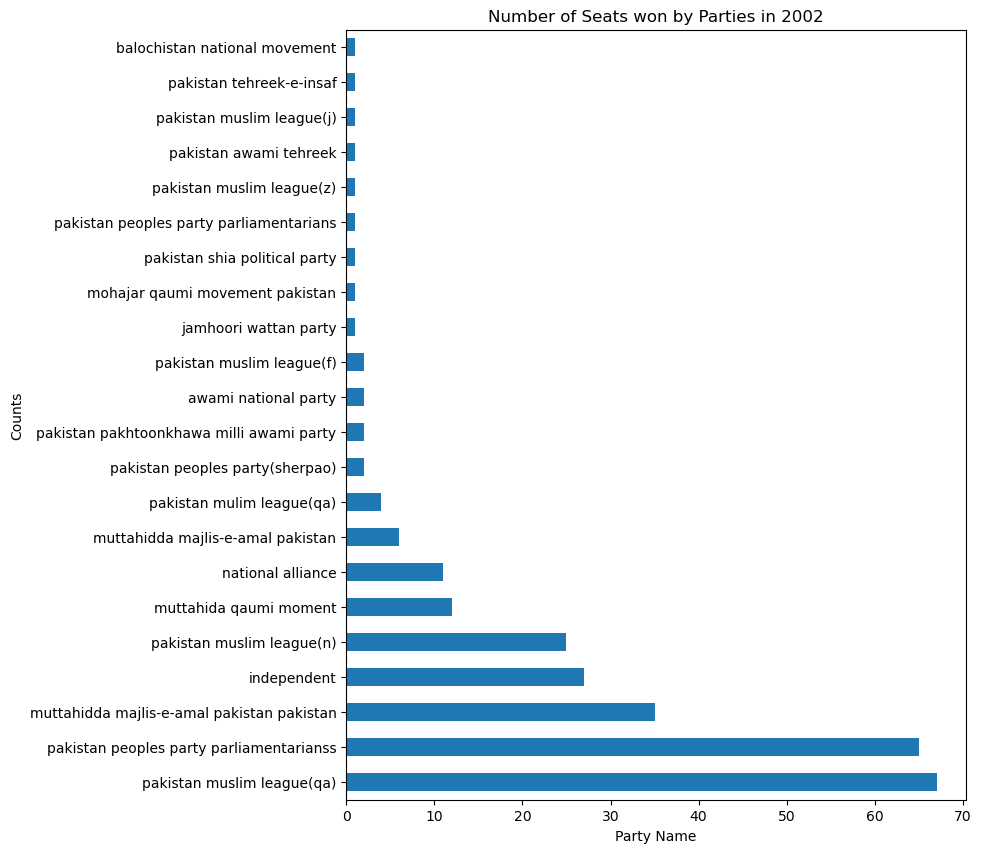

In [52]:
plt.figure(figsize=(8,10))
df[df['Result2002']=='won']['Party2002'].value_counts().plot.barh()
plt.xlabel('Party Name')
plt.ylabel('Counts')
plt.title('Number of Seats won by Parties in 2002')

**Nmber of Seats won by parties in 2008**

Text(0.5, 1.0, 'Number of Seats won by Parties in 2008')

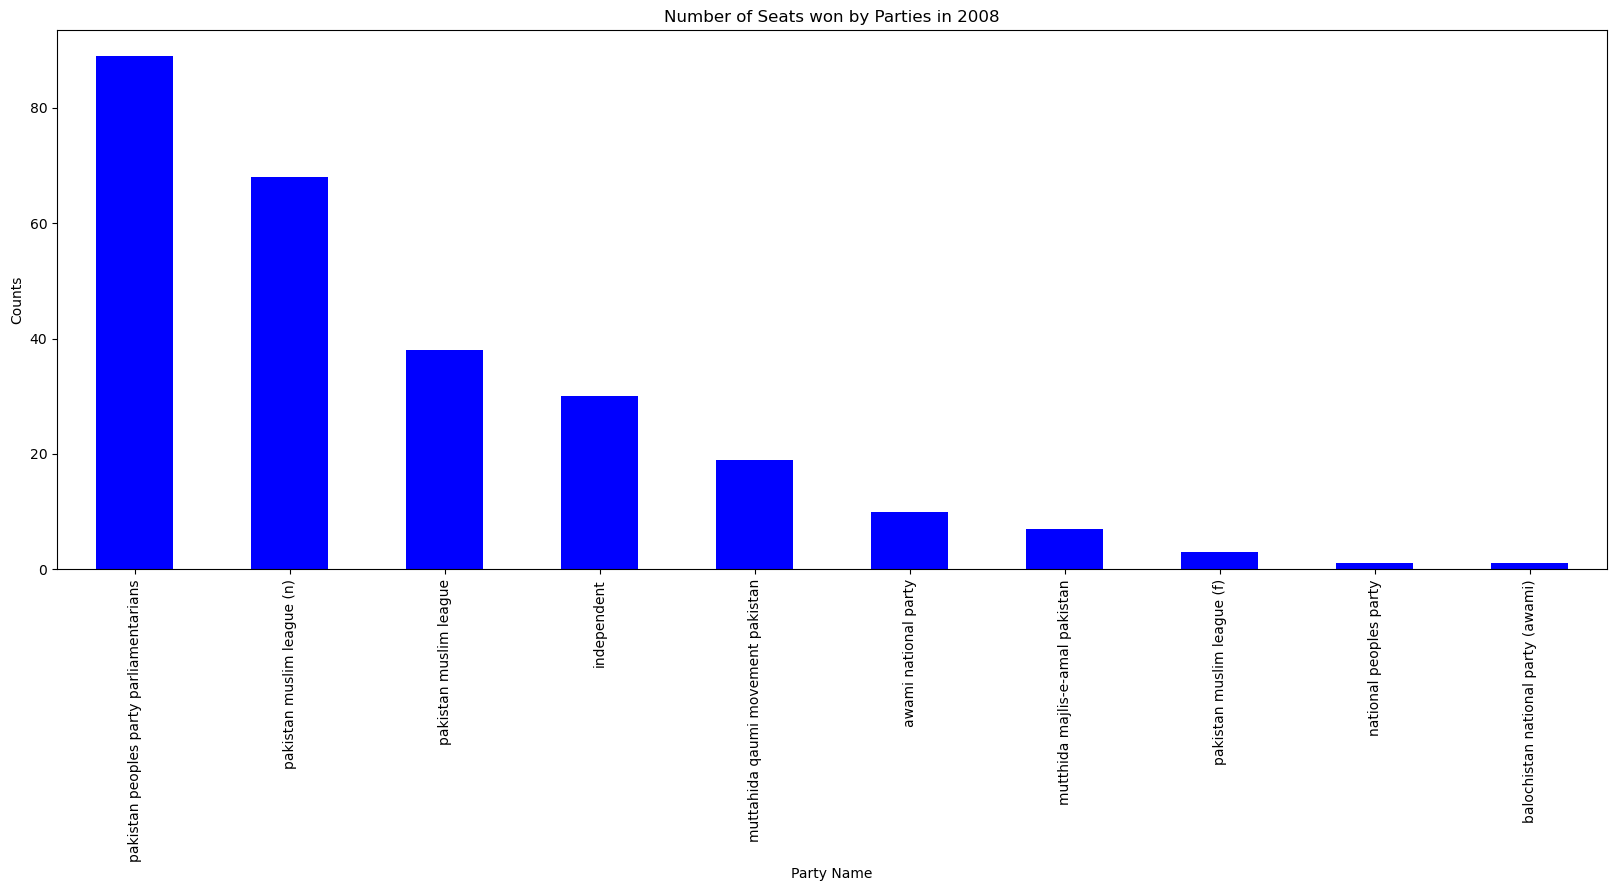

In [53]:
plt.figure(figsize=(20,7))
df[df['Result2008']=='won']['Party2008'].value_counts().plot.bar(color='b')
plt.xlabel('Party Name')
plt.ylabel('Counts')
plt.title('Number of Seats won by Parties in 2008')

**Nmber of Seats won by parties in 2013**

Text(0.5, 1.0, 'Number of Seats won by Parties in 2013')

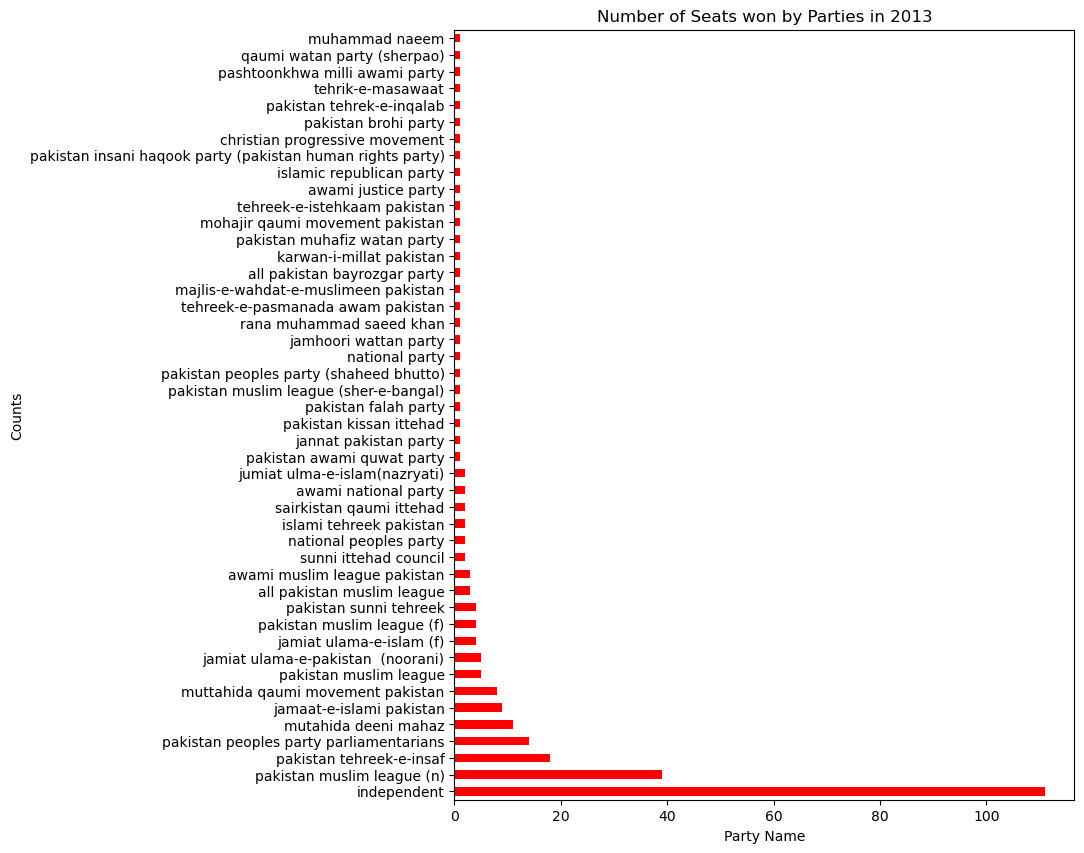

In [54]:
plt.figure(figsize=(8,10))
df[df['Result2013']=='won']['Party2013'].value_counts().plot.barh(color='r')
plt.xlabel('Party Name')
plt.ylabel('Counts')
plt.title('Number of Seats won by Parties in 2013')

**Nmber of Seats won by parties in 2018**

Text(0.5, 1.0, 'Number of Seats won by Parties in 2018')

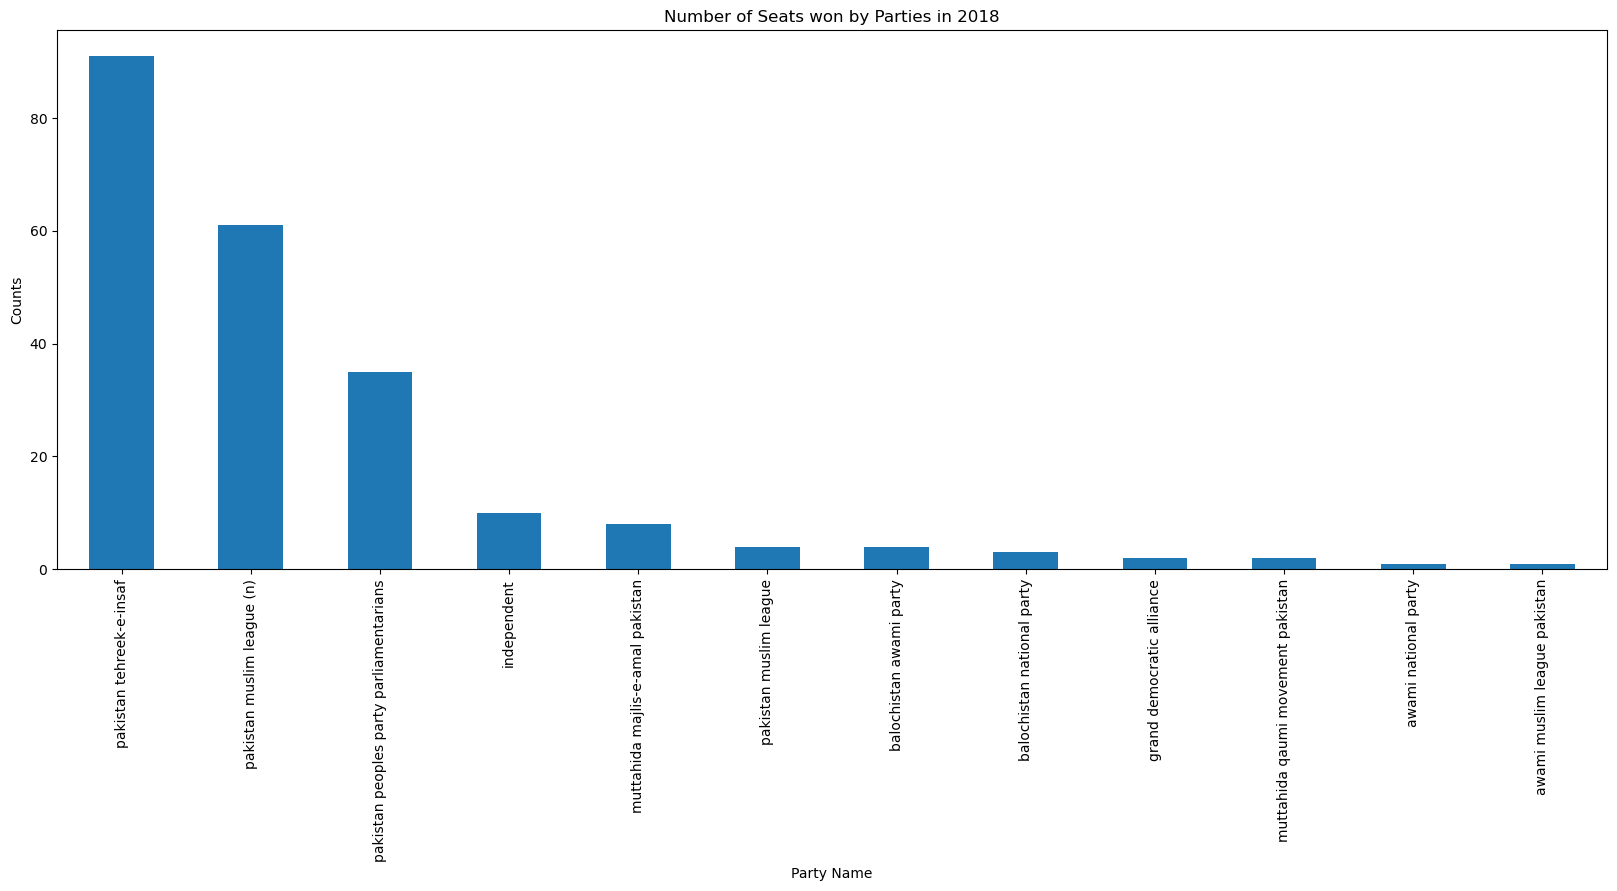

In [55]:
plt.figure(figsize=(20,7))
df[df['Result2018']=='won']['Party2018'].value_counts().plot.bar()
plt.xlabel('Party Name')
plt.ylabel('Counts')
plt.title('Number of Seats won by Parties in 2018')

**Number of seats won as per district by parties in 2002**

/tmp/ipykernel_20/3113892327.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2002']=='pakistan muslim league(qa)'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/3113892327.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2002']=='pakistan peoples party parliamentarianss'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/3113892327.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2002']=='muttahidda majlis-e-amal pakistan pakistan'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/3113892327.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2002']=='pakistan muslim league(n)'][df['Result2002']=='won']['District200

<Axes: title={'center': 'Number of Seats won by pakistan muslim league(n) as per district in 2002'}, xlabel='District', ylabel='District2002'>

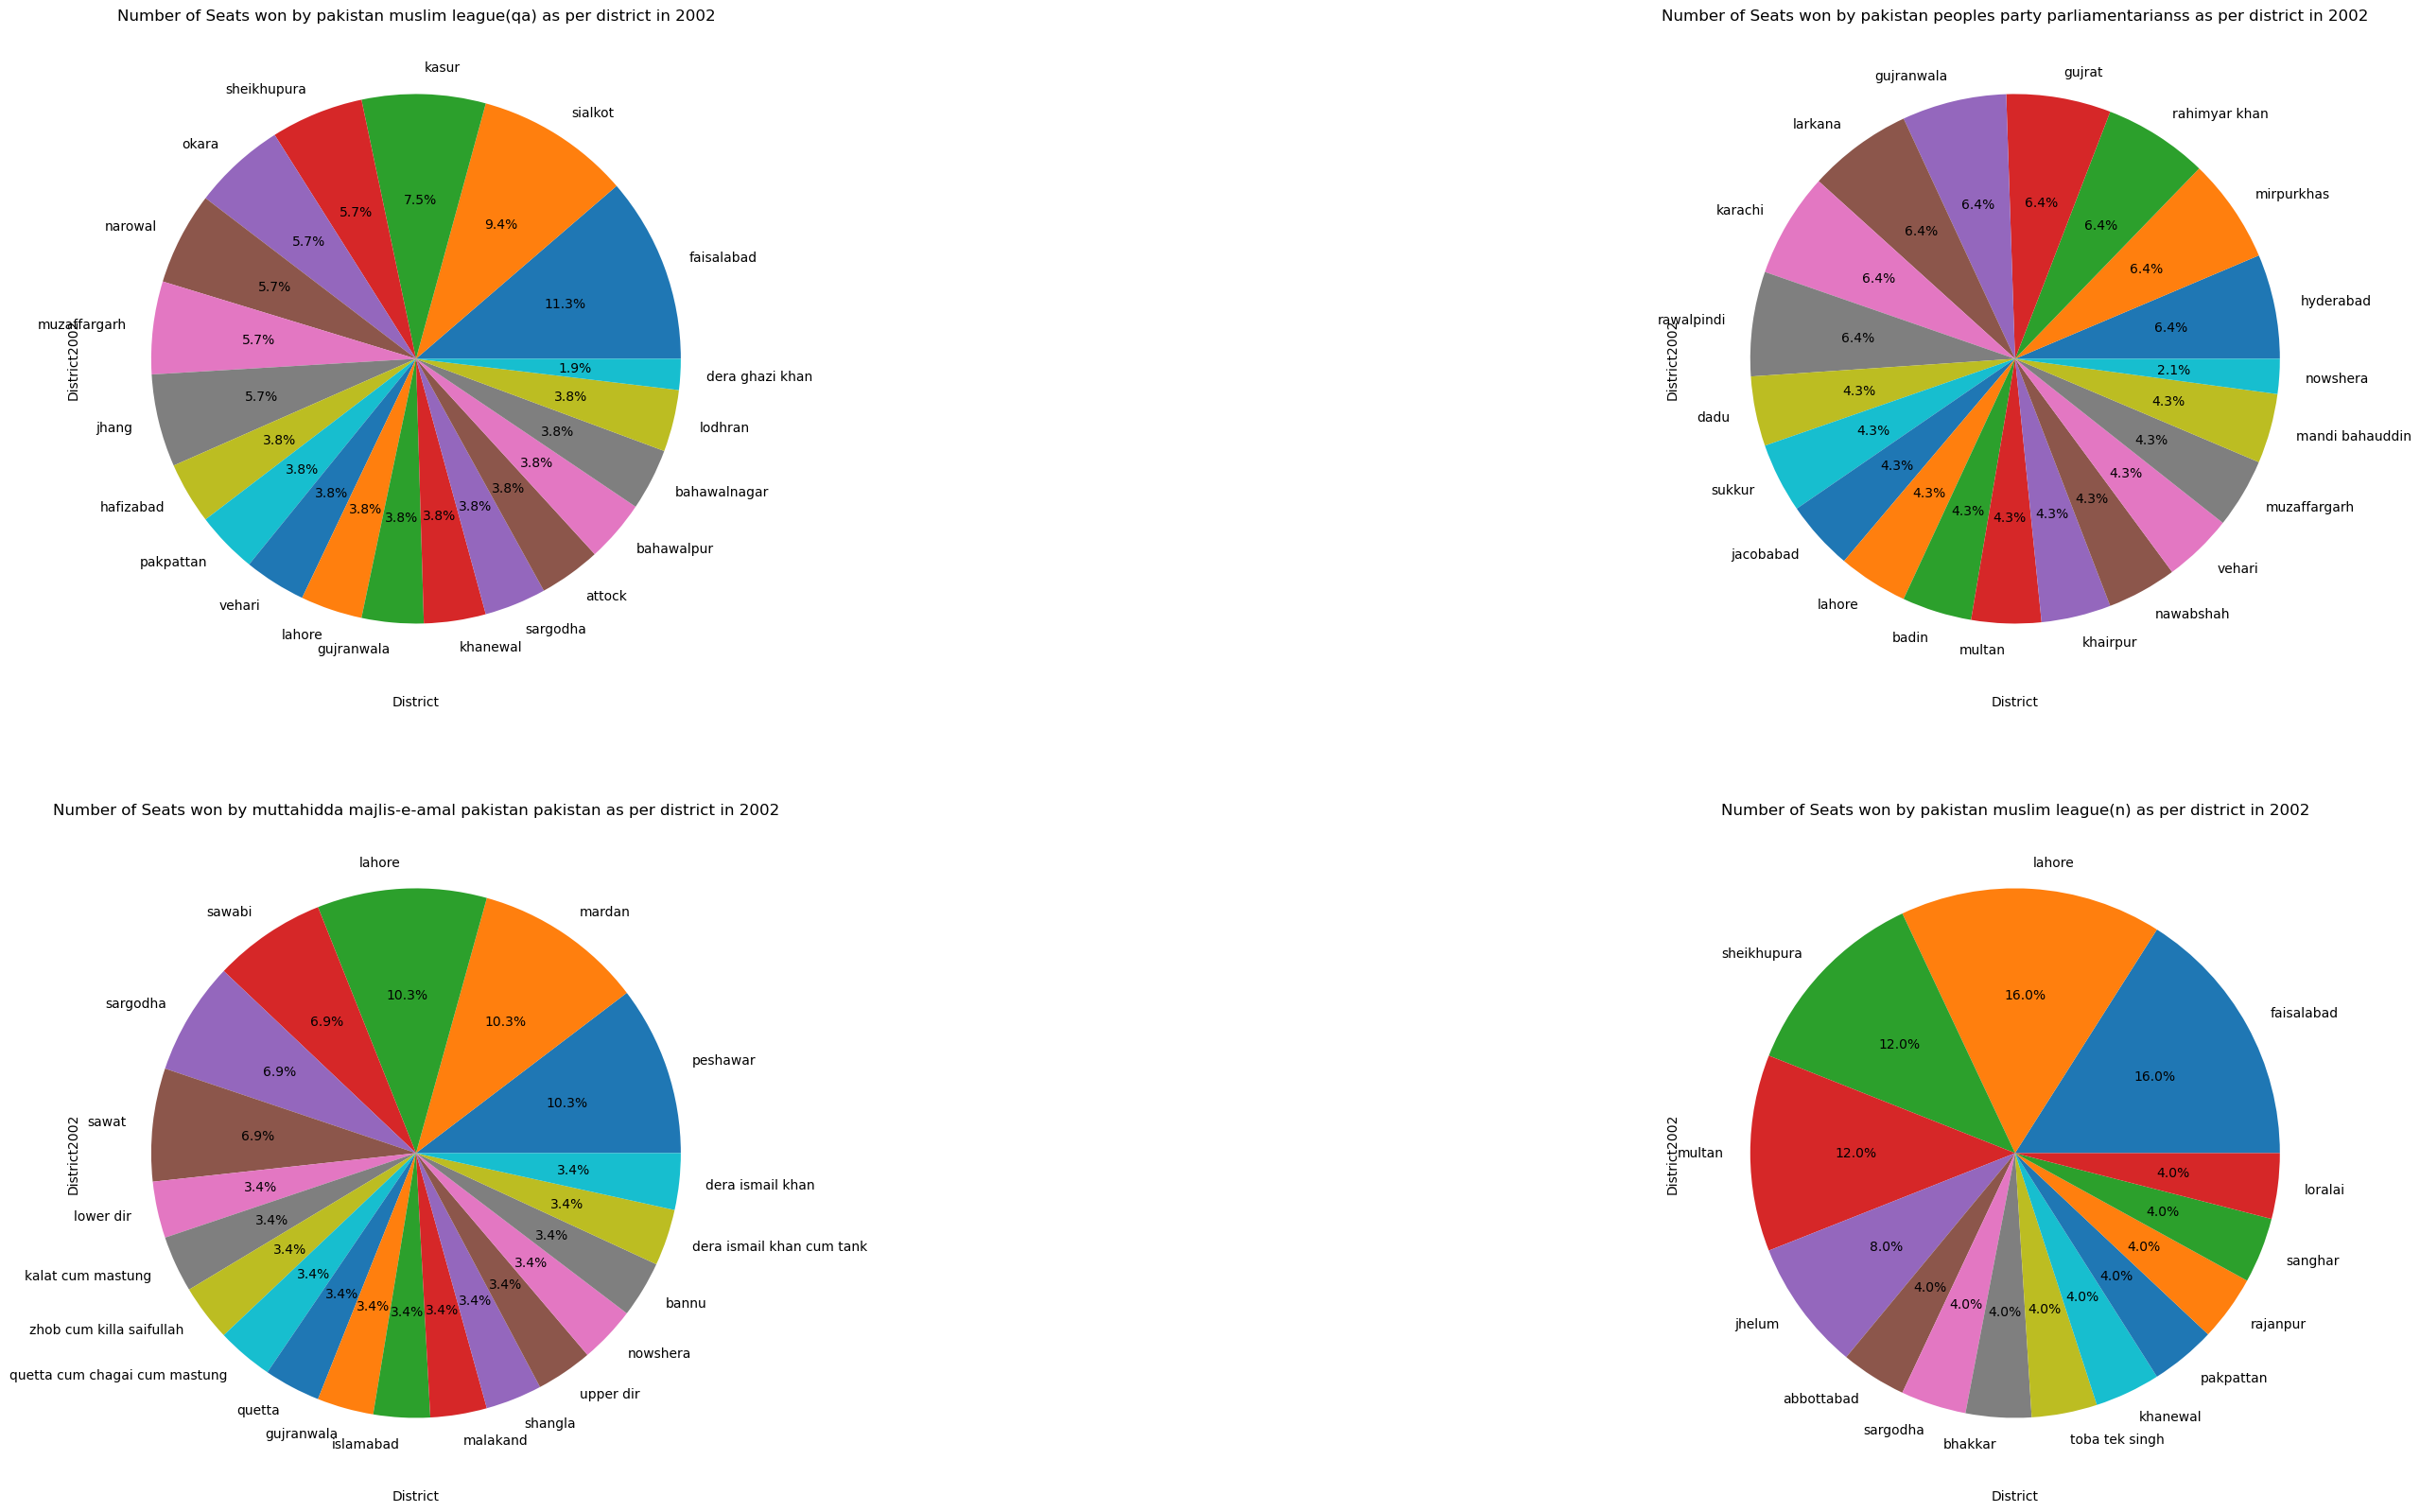

In [56]:
plt.figure(figsize=(40,20))

plt.subplot(2,2,1)
plt.title('Number of Seats won by pakistan muslim league(qa) as per district in 2002')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2002']=='pakistan muslim league(qa)'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,2)
plt.title('Number of Seats won by pakistan peoples party parliamentarianss as per district in 2002')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2002']=='pakistan peoples party parliamentarianss'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,3)
plt.title('Number of Seats won by muttahidda majlis-e-amal pakistan pakistan as per district in 2002')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2002']=='muttahidda majlis-e-amal pakistan pakistan'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,4)
plt.title('Number of Seats won by pakistan muslim league(n) as per district in 2002')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2002']=='pakistan muslim league(n)'][df['Result2002']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')


**Number of seats won as per district by parties in 2008**

/tmp/ipykernel_20/1631740267.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2008']=='independent'][df['Result2008']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/1631740267.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2008']=='pakistan peoples party parliamentarians'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/1631740267.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2008']=='pakistan muslim league'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/1631740267.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2008']=='pakistan muslim league (n)'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pi

<Axes: title={'center': 'Number of Seats won by pakistan muslim league (n) as per district in 2008'}, xlabel='District', ylabel='District2008'>

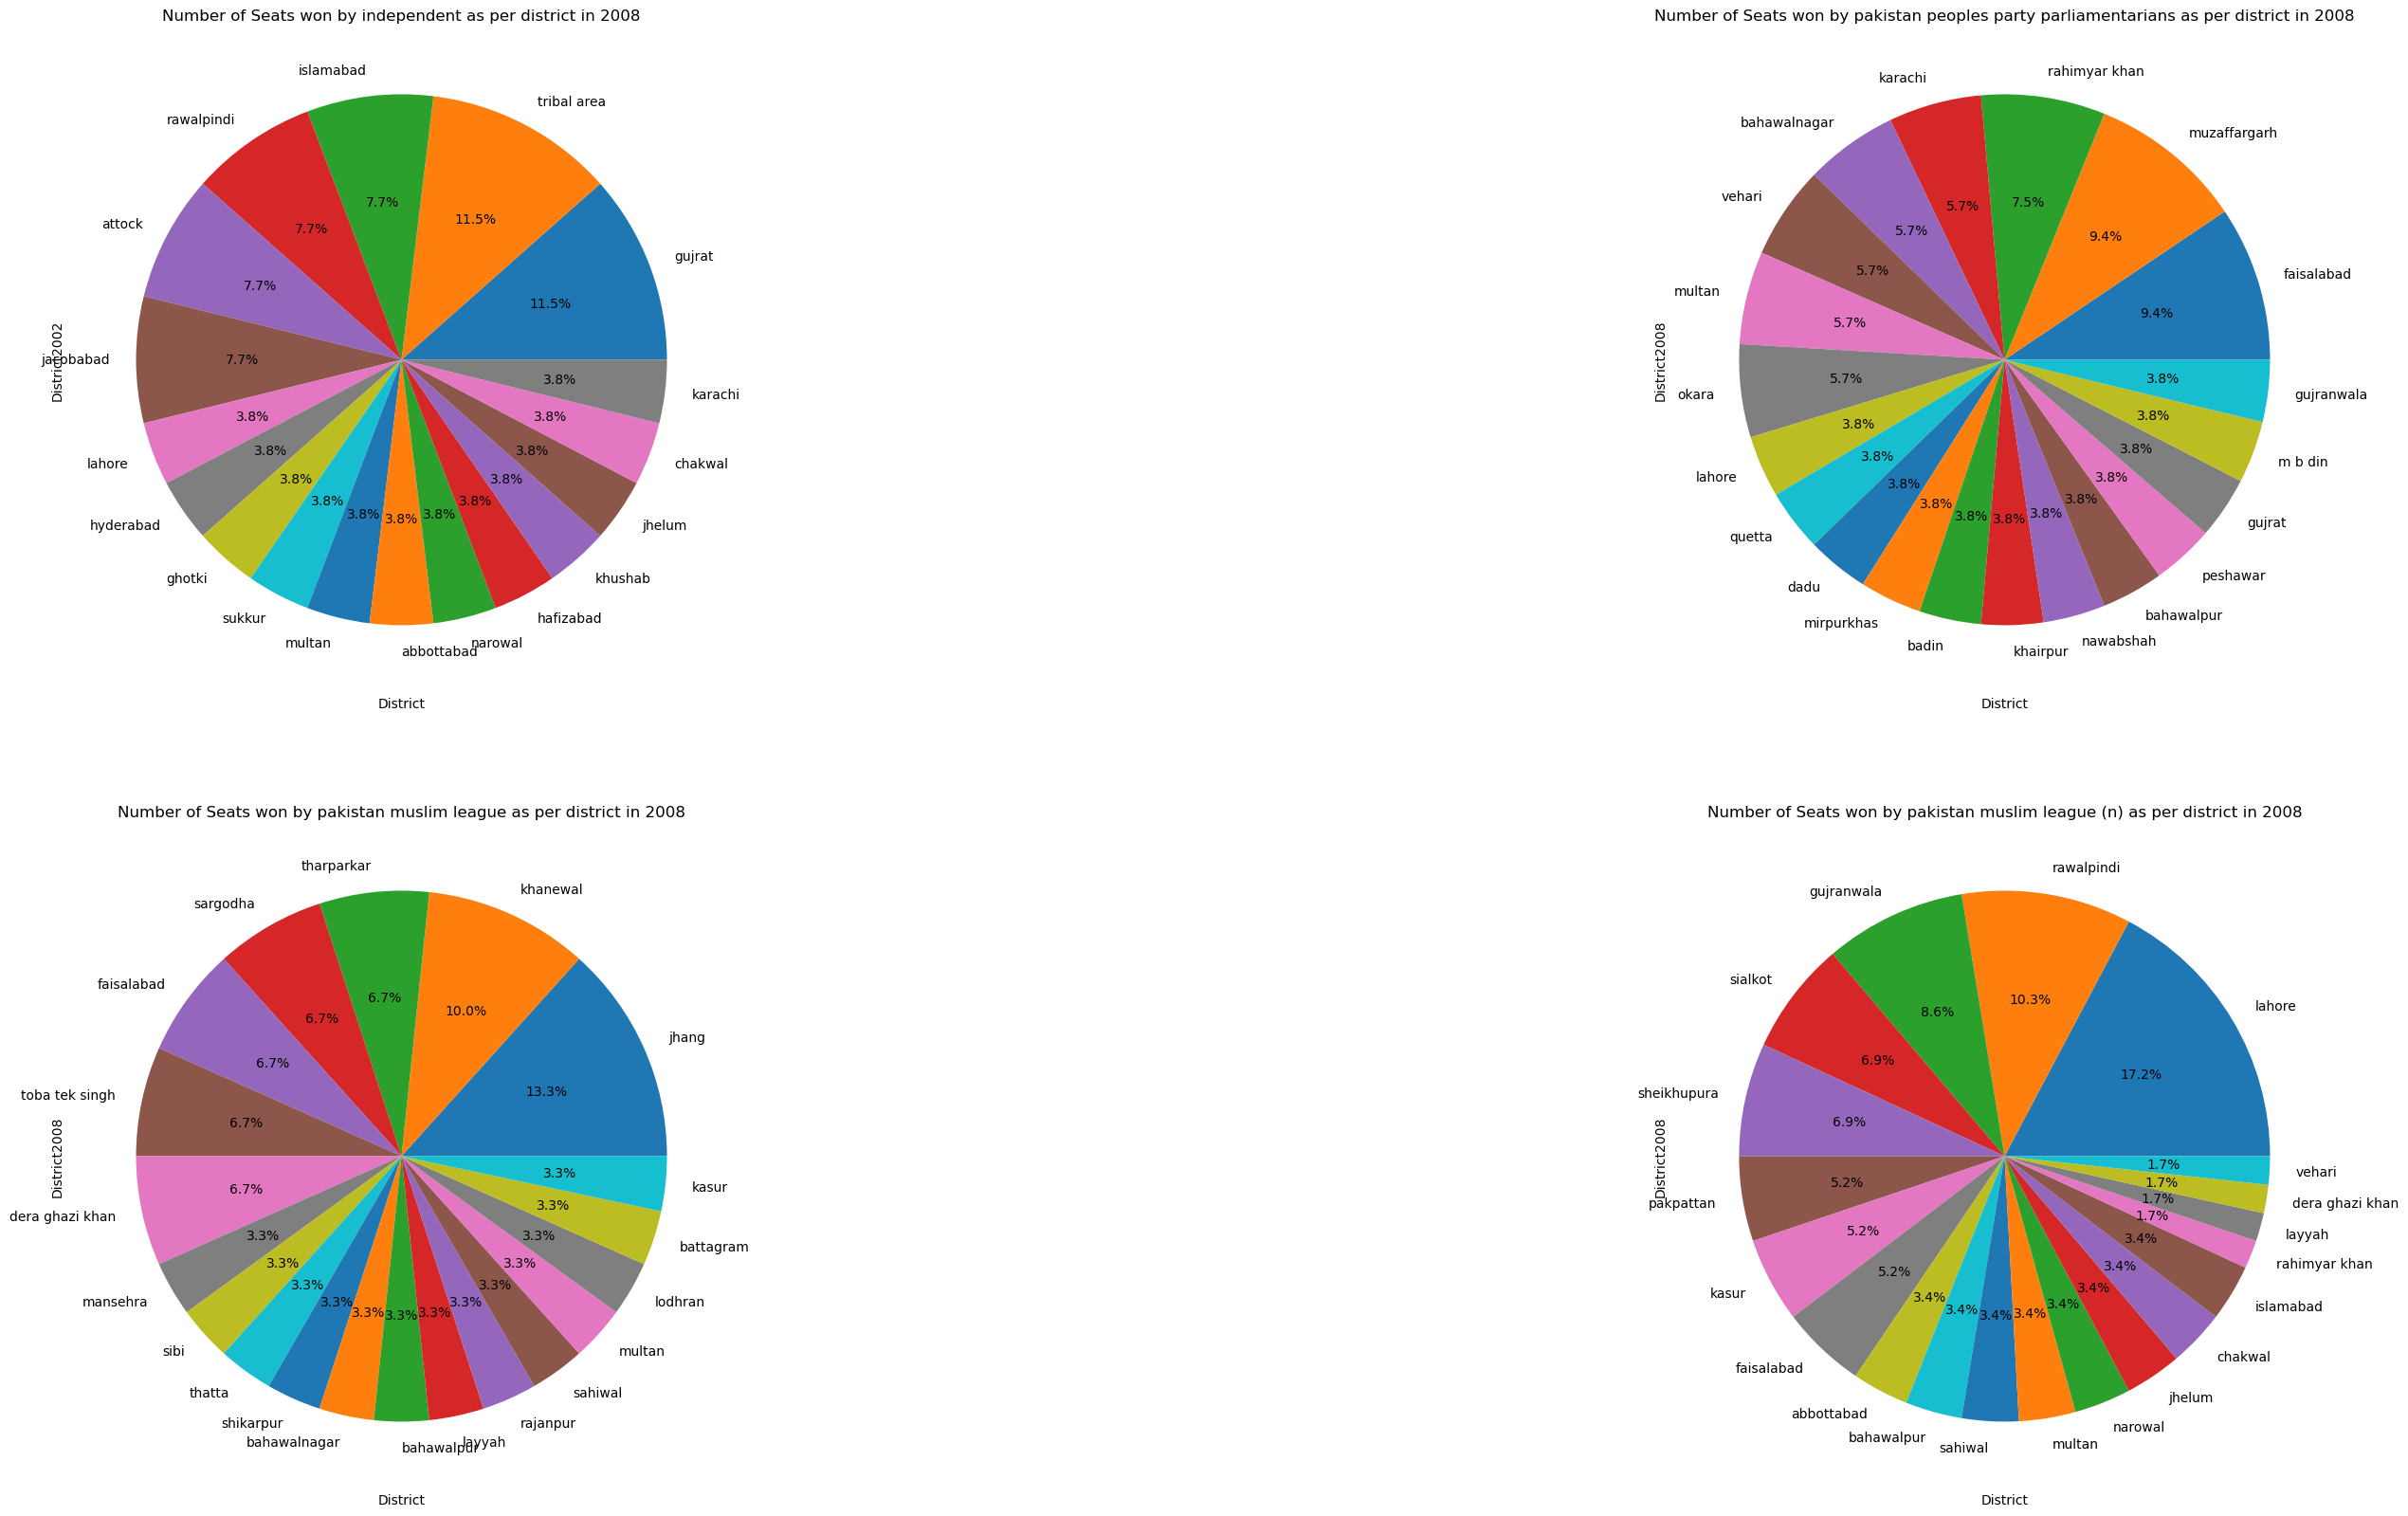

In [57]:
plt.figure(figsize=(40,20))

plt.subplot(2,2,1)
plt.title('Number of Seats won by independent as per district in 2008')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2008']=='independent'][df['Result2008']=='won']['District2002'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,2)
plt.title('Number of Seats won by pakistan peoples party parliamentarians as per district in 2008')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2008']=='pakistan peoples party parliamentarians'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,3)
plt.title('Number of Seats won by pakistan muslim league as per district in 2008')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2008']=='pakistan muslim league'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,4)
plt.title('Number of Seats won by pakistan muslim league (n) as per district in 2008')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2008']=='pakistan muslim league (n)'][df['Result2008']=='won']['District2008'].value_counts().head(20).plot.pie(autopct='%1.1f%%')


**Number of seats won as per district by parties in 2013**

/tmp/ipykernel_20/2617030371.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2013']=='independent'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/2617030371.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2013']=='pakistan muslim league (n)'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/2617030371.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2013']=='pakistan peoples party parliamentarians'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/2617030371.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2013']=='pakistan tehreek-e-insaf'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.

<Axes: title={'center': 'Number of Seats won by pakistan tehreek-e-insaf as per district in 2013'}, xlabel='District', ylabel='District2013'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


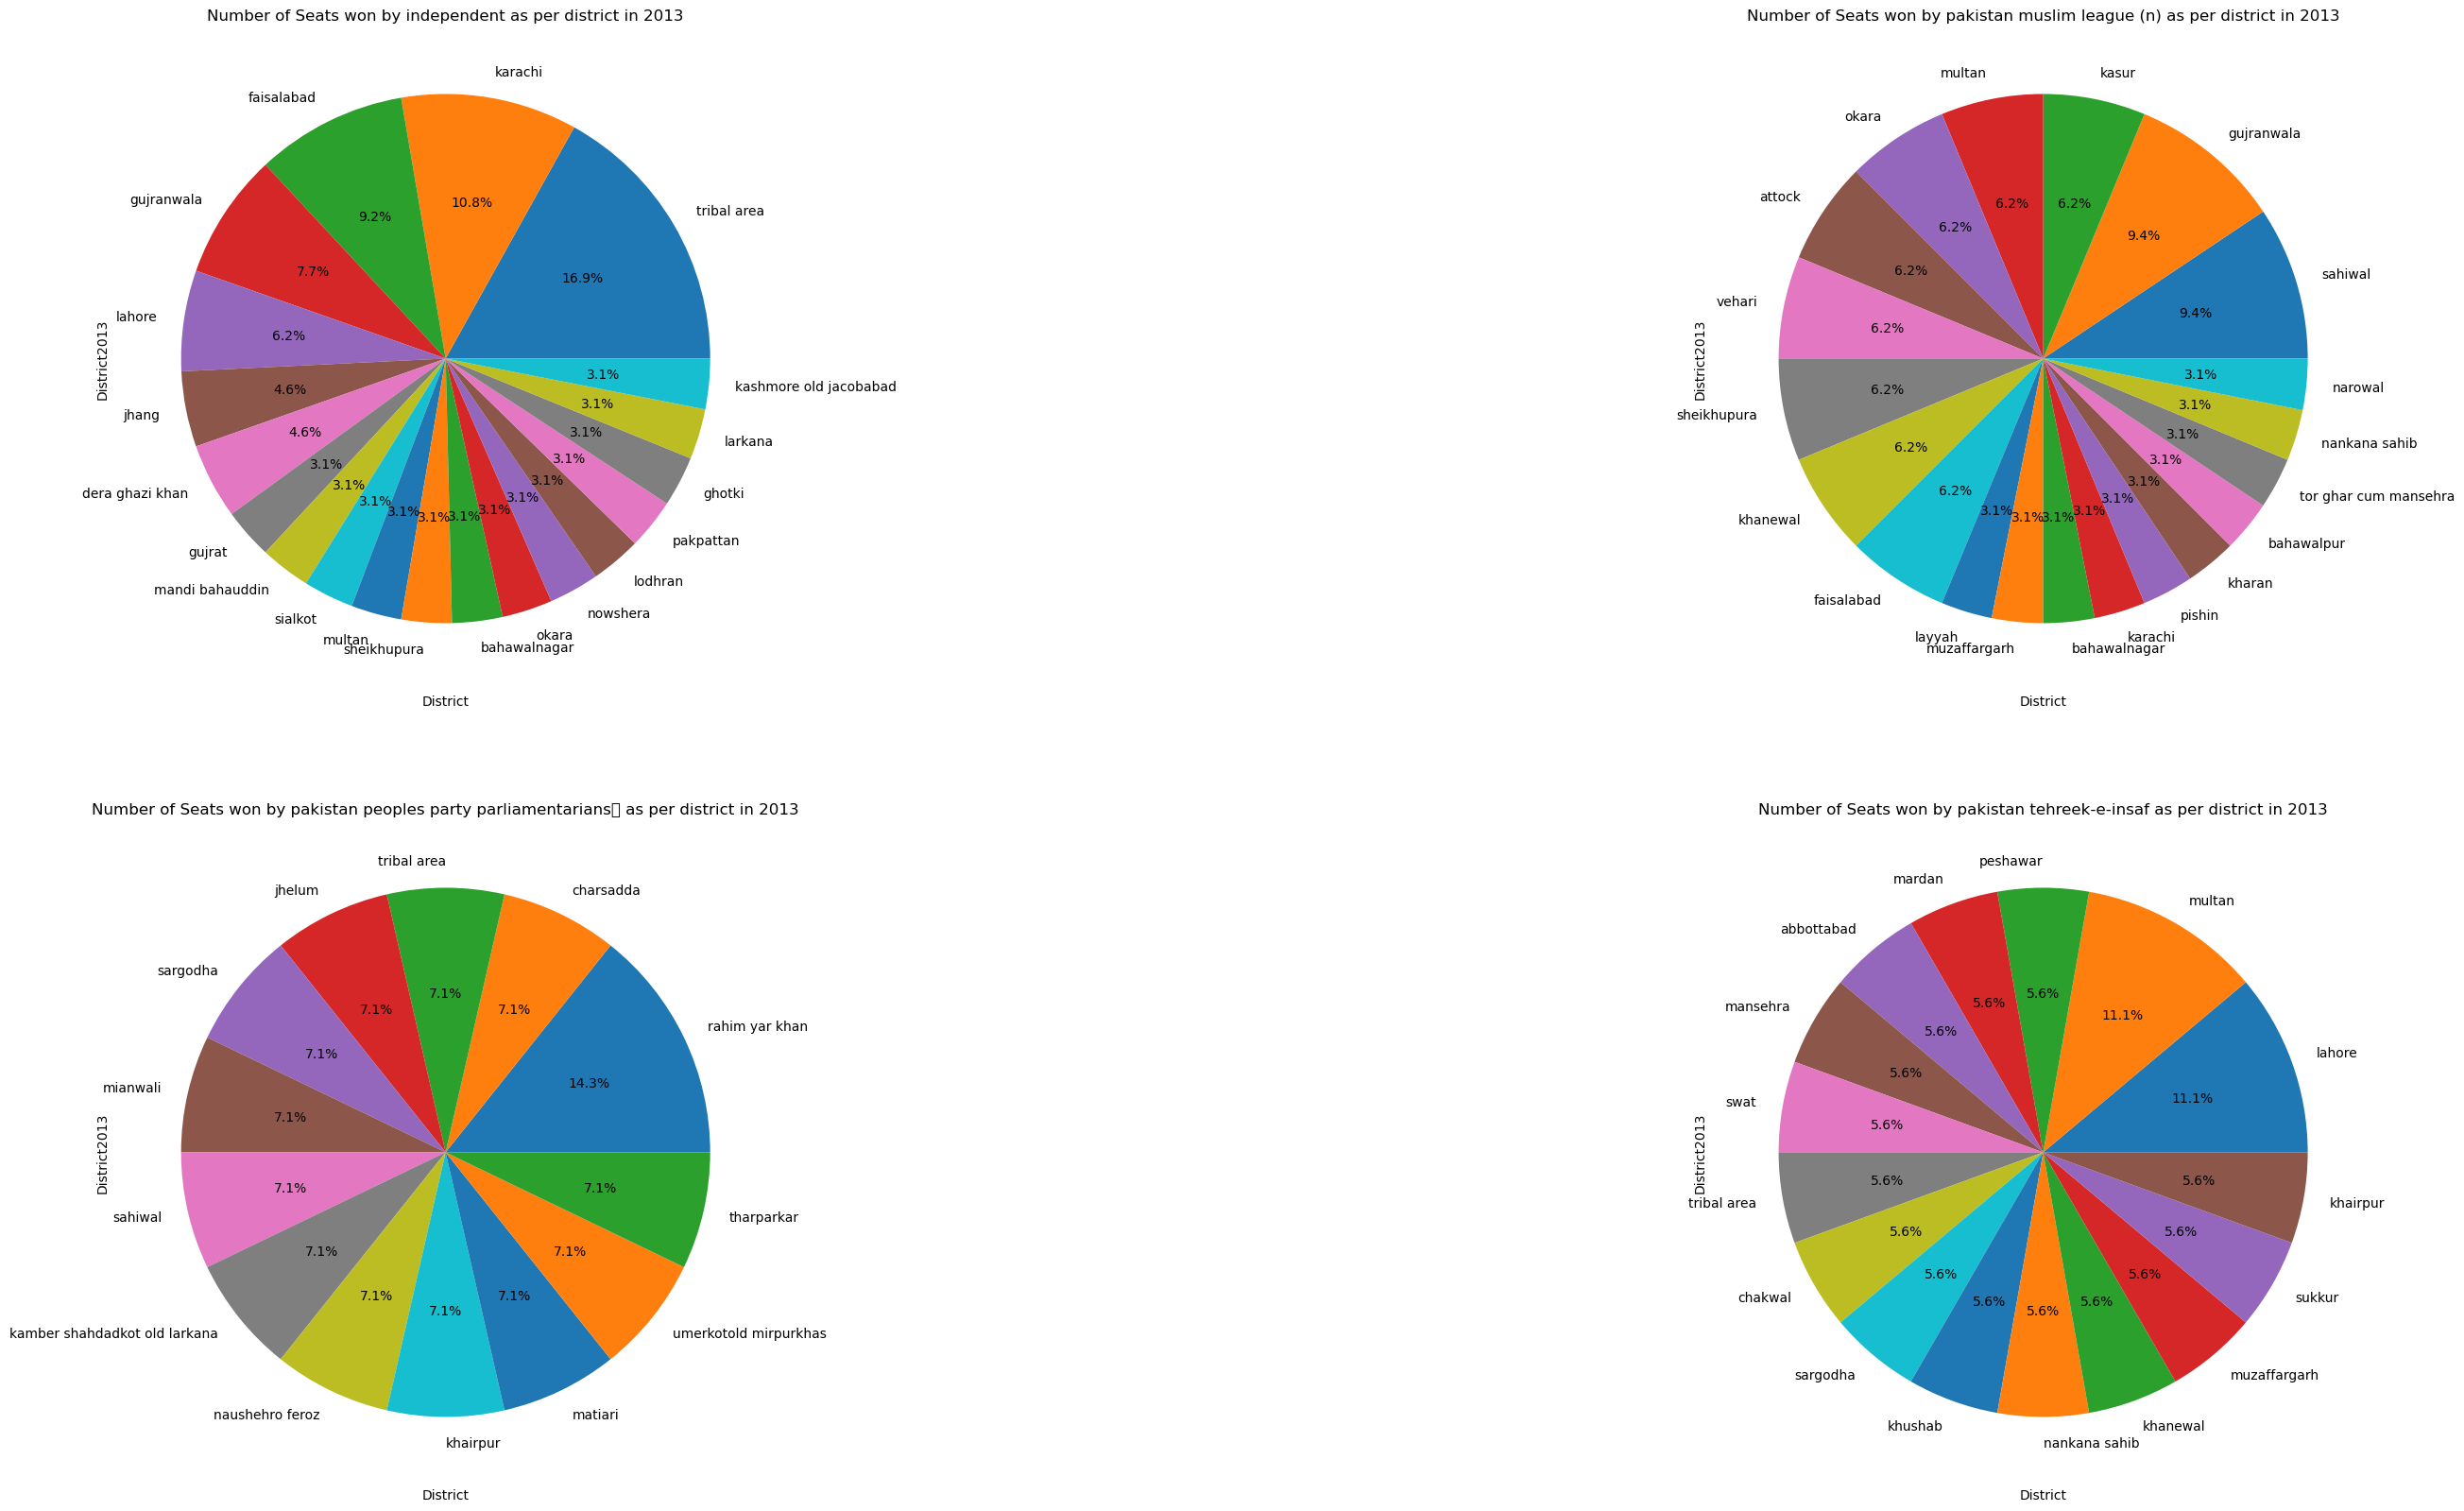

In [58]:
plt.figure(figsize=(40,20))

plt.subplot(2,2,1)
plt.title('Number of Seats won by independent as per district in 2013')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2013']=='independent'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,2)
plt.title('Number of Seats won by pakistan muslim league (n) as per district in 2013')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2013']=='pakistan muslim league (n)'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,3)
plt.title('Number of Seats won by pakistan peoples party parliamentarians	 as per district in 2013')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2013']=='pakistan peoples party parliamentarians'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,4)
plt.title('Number of Seats won by pakistan tehreek-e-insaf as per district in 2013')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2013']=='pakistan tehreek-e-insaf'][df['Result2013']=='won']['District2013'].value_counts().head(20).plot.pie(autopct='%1.1f%%')


**Number of seats won as per district by parties in 2018**

/tmp/ipykernel_20/677853089.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2018']=='independent'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/677853089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2018']=='pakistan muslim league (n)'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/677853089.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2018']=='pakistan peoples party parliamentarians'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
/tmp/ipykernel_20/677853089.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Party2018']=='pakistan tehreek-e-insaf'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(

<Axes: title={'center': 'Number of Seats won by pakistan tehreek-e-insaf as per district in 2018'}, xlabel='District', ylabel='District2018'>

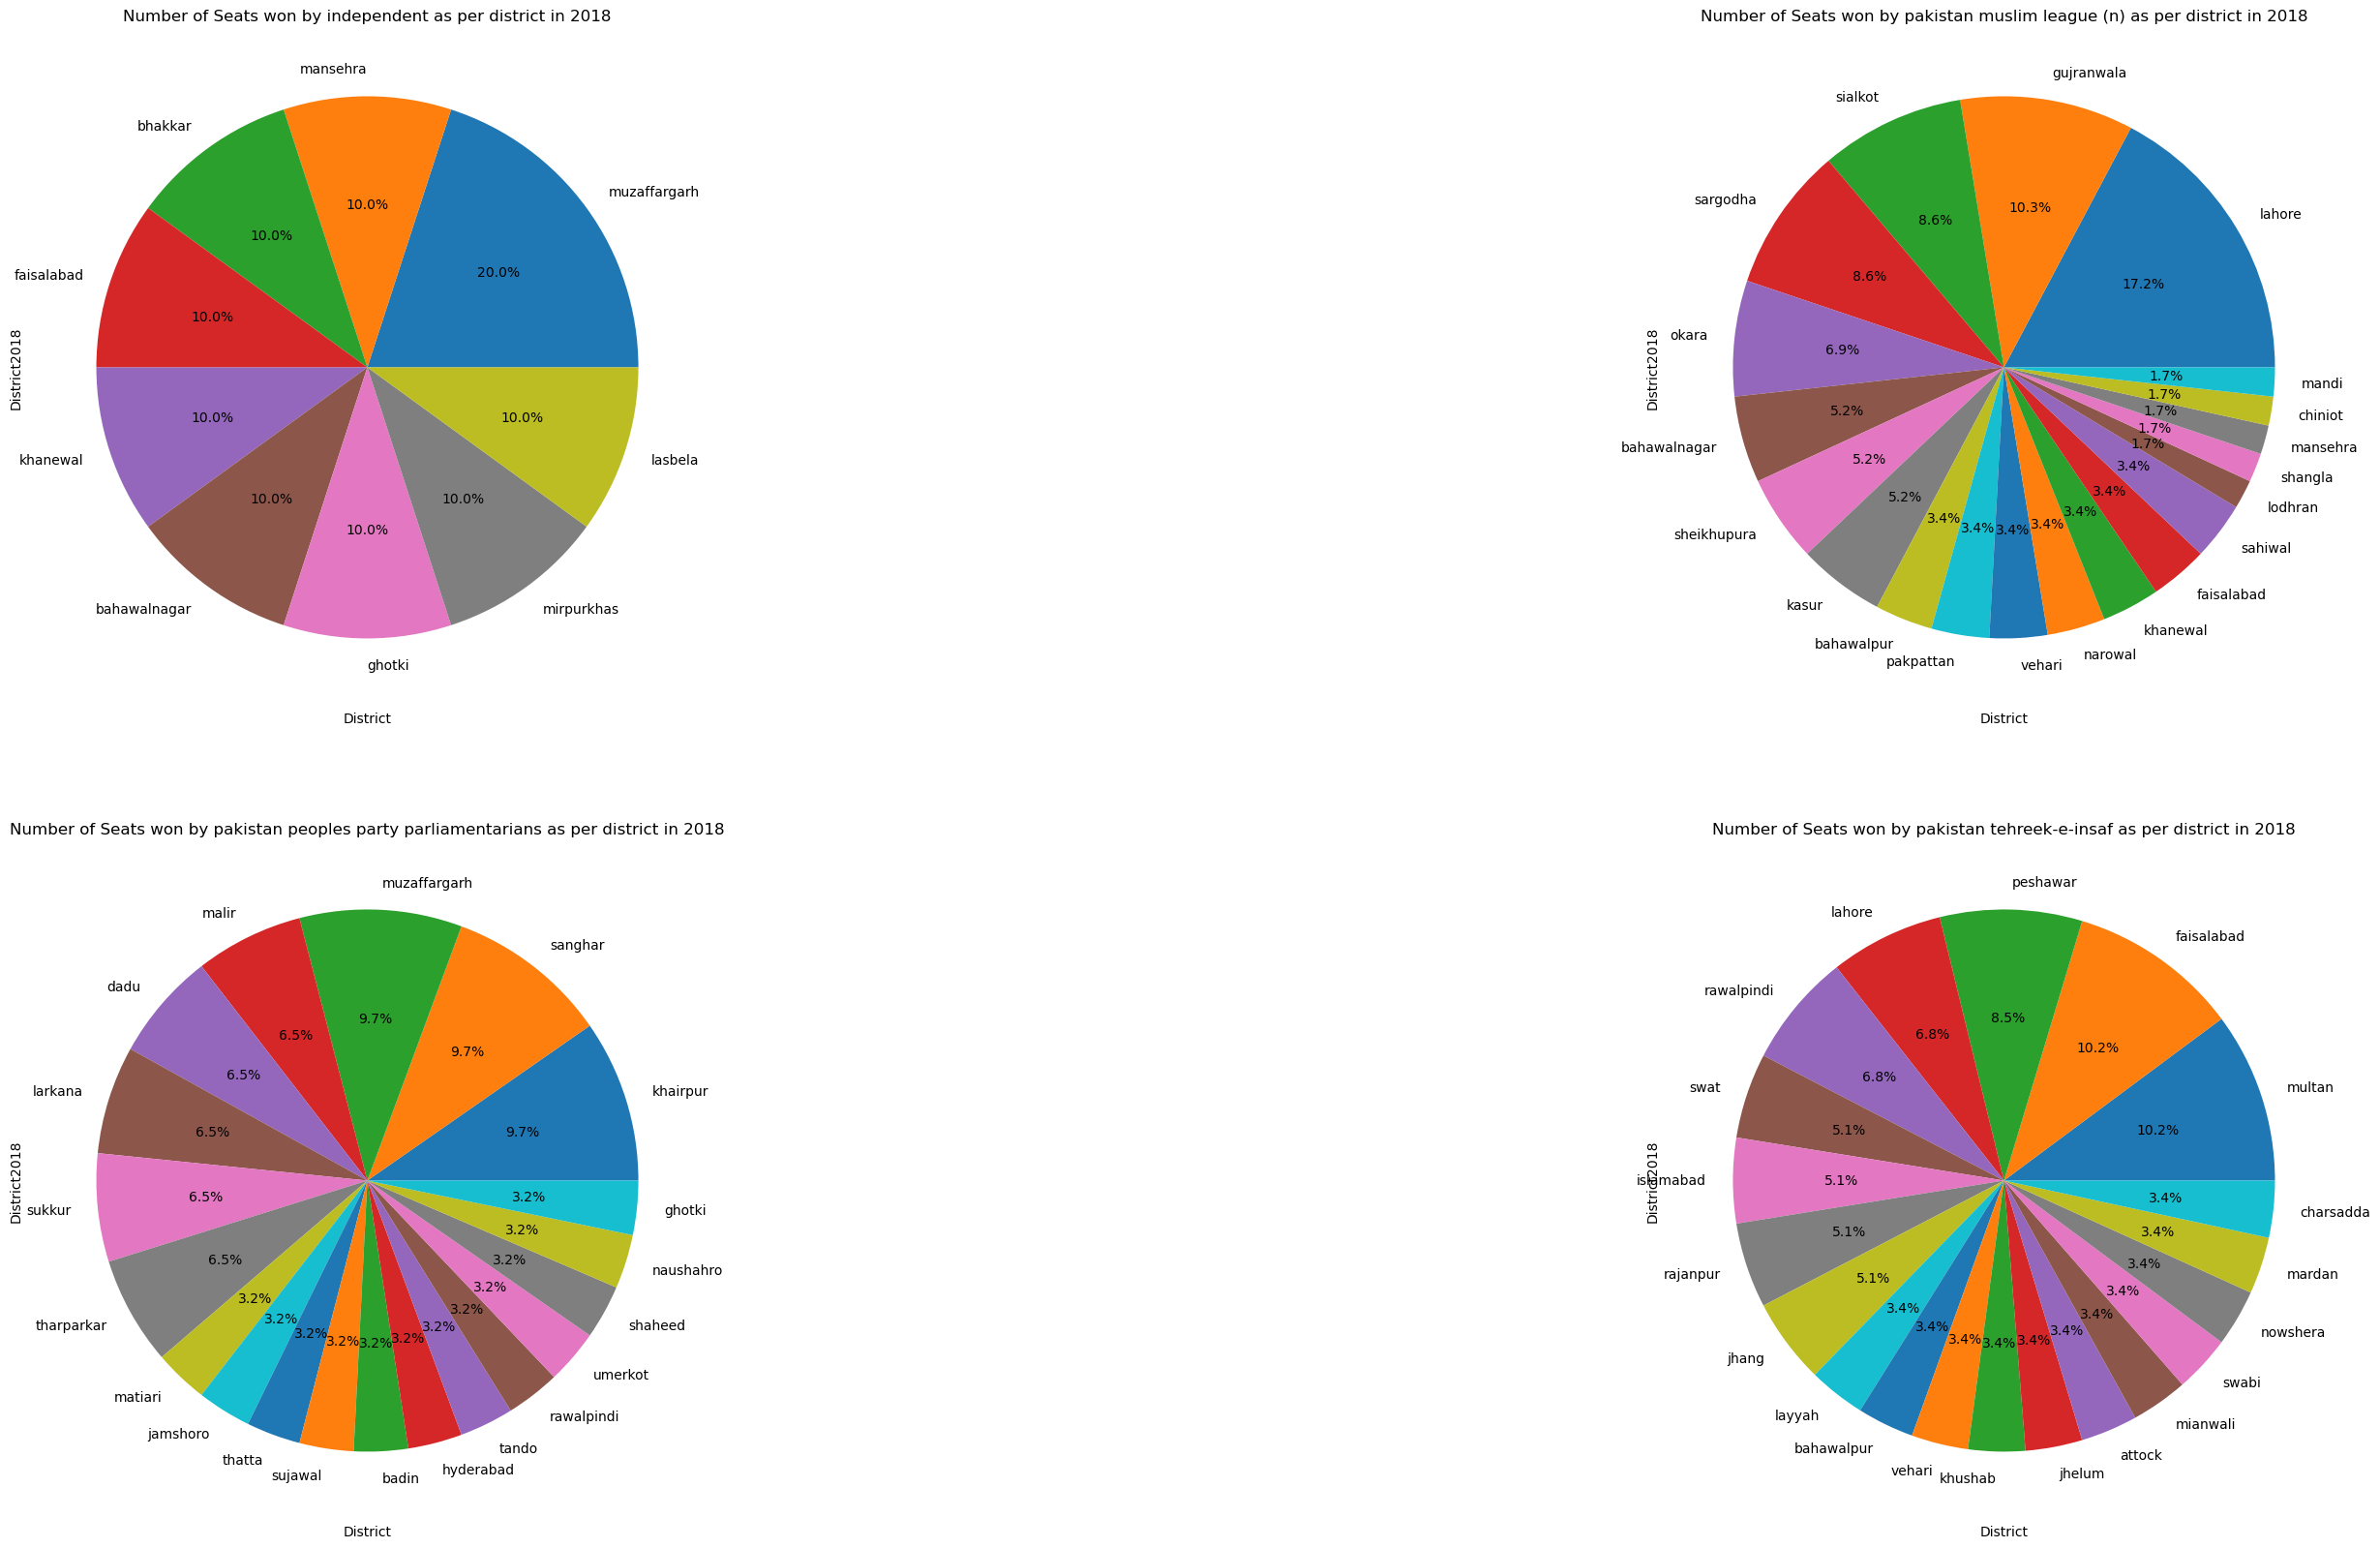

In [59]:
plt.figure(figsize=(40,20))

plt.subplot(2,2,1)
plt.title('Number of Seats won by independent as per district in 2018')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2018']=='independent'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,2)
plt.title('Number of Seats won by pakistan muslim league (n) as per district in 2018')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2018']=='pakistan muslim league (n)'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,3)
plt.title('Number of Seats won by pakistan peoples party parliamentarians as per district in 2018')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2018']=='pakistan peoples party parliamentarians'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')

plt.subplot(2,2,4)
plt.title('Number of Seats won by pakistan tehreek-e-insaf as per district in 2018')
plt.xlabel('District')
plt.ylabel('Counts')
df[df['Party2018']=='pakistan tehreek-e-insaf'][df['Result2018']=='won']['District2018'].value_counts().head(20).plot.pie(autopct='%1.1f%%')
